In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
df =  pd.read_csv('sample_data/kc_house_data.csv')

In [118]:
df.head()

,id,price,bedrooms,bathrooms,sqft
0,7129300520,221900.0,3,1.00,1180
1,6414100192,538000.0,3,2.25,2570
2,5631500400,180000.0,2,1.00,770
3,2487200875,604000.0,4,3.00,1960
4,1954400510,510000.0,3,2.00,1680


# Exploratory Data Analysis

In [119]:
#Check if there is missing values
df.isnull().sum()

id           0
price        0
bedrooms     0
bathrooms    0
sqft         0
dtype: int64

In [120]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,75000.0,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.0,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft,21613.0,2.079900e+03,9.184409e+02,290.0,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04


<ipython-input-116-a9a982f5e54e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

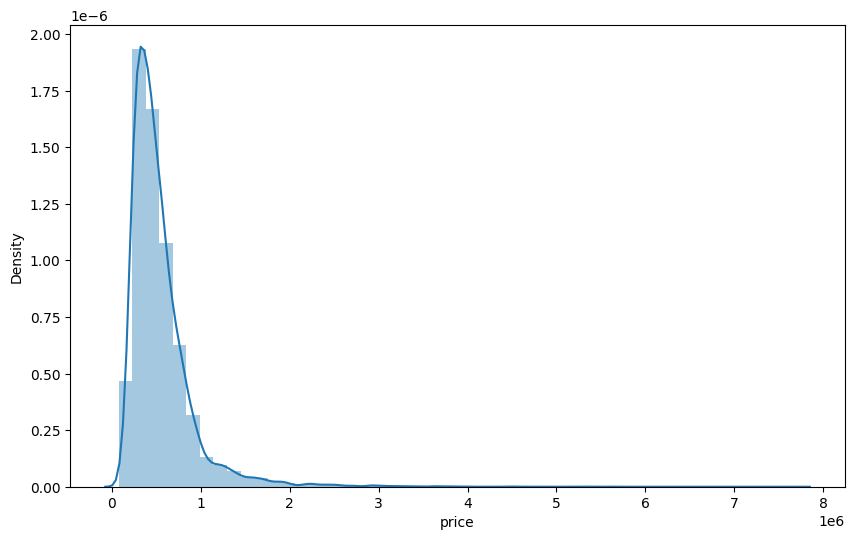

In [116]:
#Plotting a distribution plot
plt.figure(figsize = (10,6))
sns.distplot(df['price'])

<Axes: ylabel='count'>

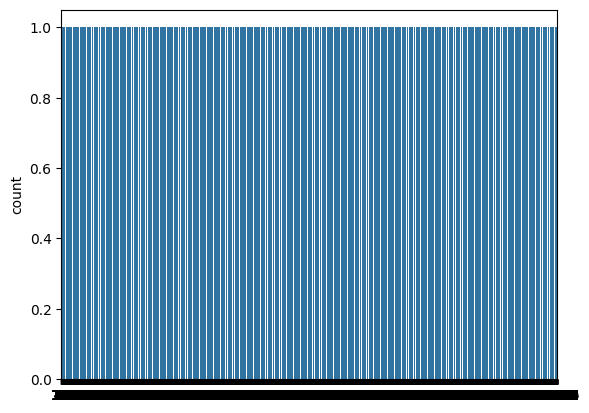

In [117]:
sns.countplot(df['bedrooms'])

In [121]:
#Check Correlations
df.corr()['price'].sort_values()

id          -0.016797
bedrooms     0.308338
bathrooms    0.525134
sqft         0.702044
price        1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft'>

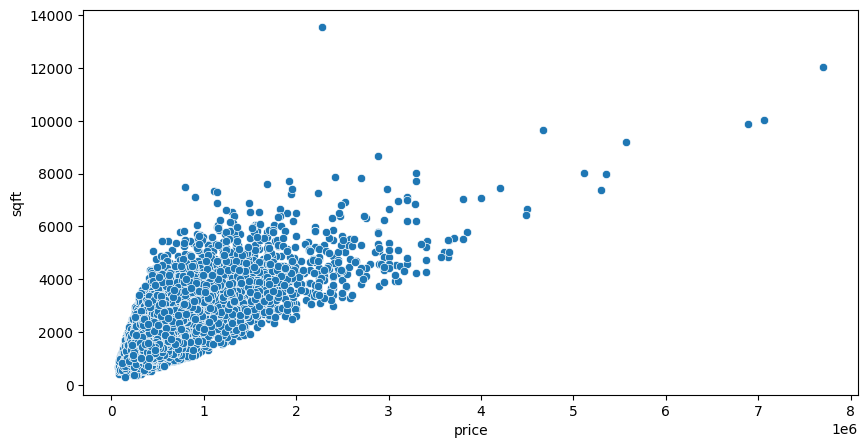

In [122]:
#Ploting Scatter Diagram
plt.figure(figsize = (10,5)) #Increase the graph size
sns.scatterplot(x = 'price', y = 'sqft', data = df)

<Axes: xlabel='bedrooms', ylabel='price'>

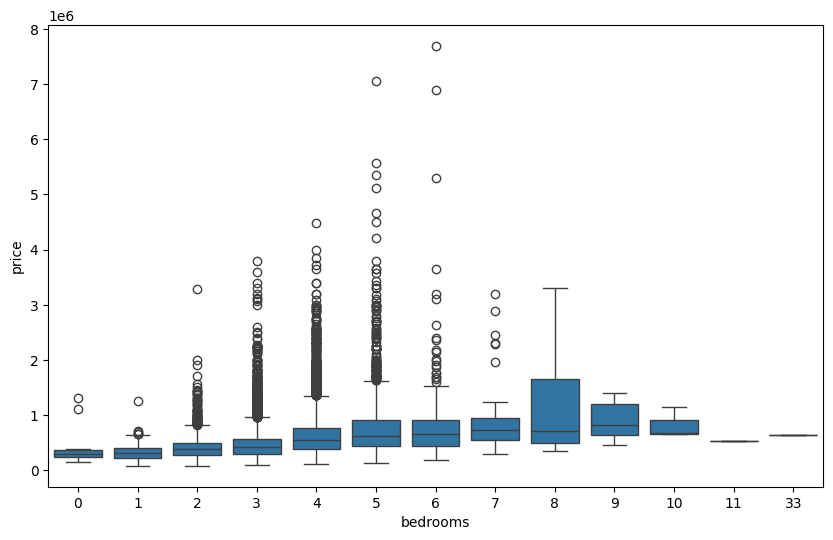

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

In [123]:
#Check price in descending order
df.sort_values('price', ascending=False).head(20)

,id,price,bedrooms,bathrooms,sqft
7252,6762700020,7700000.0,6,8.00,12050
3914,9808700762,7060000.0,5,4.50,10040
9254,9208900037,6890000.0,6,7.75,9890
4411,2470100110,5570000.0,5,5.75,9200
1448,8907500070,5350000.0,5,5.00,8000
1315,7558700030,5300000.0,6,6.00,7390
1164,1247600105,5110000.0,5,5.25,8010
8092,1924059029,4670000.0,5,6.75,9640
2626,7738500731,4500000.0,5,5.50,6640
8638,3835500195,4490000.0,4,3.00,6430


In [124]:
#To find 1% of the data
len(df)*0.01

216.13

In [125]:
#Remove the 1 % most expensive house and take the 99 % rest of the house
non_top_1_perc = df.sort_values('price', ascending=False).loc[216:]

In [126]:
non_top_1_perc

,id,price,bedrooms,bathrooms,sqft
216,46100204,1510000.0,5,3.00,3300
3153,1336800015,1510000.0,4,3.25,3660
2781,5701500030,1510000.0,4,3.50,3480
20518,3232200085,1500000.0,6,3.50,3670
18382,7923250090,1500000.0,3,3.00,3110
...,...,...,...,...,...
8274,3883800011,82000.0,3,1.00,860
16198,3028200080,81000.0,2,1.00,730
465,8658300340,80000.0,1,0.75,430
15293,40000362,78000.0,2,1.00,780


### Working with Feature Data

In [127]:
df.head()

,id,price,bedrooms,bathrooms,sqft
0,7129300520,221900.0,3,1.00,1180
1,6414100192,538000.0,3,2.25,2570
2,5631500400,180000.0,2,1.00,770
3,2487200875,604000.0,4,3.00,1960
4,1954400510,510000.0,3,2.00,1680


In [128]:
#Drop Unnecessary columns (id)
df = df.drop('id', axis = 1)

In [129]:
df

,price,bedrooms,bathrooms,sqft
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680
...,...,...,...,...
21608,360000.0,3,2.50,1530
21609,400000.0,4,2.50,2310
21610,402101.0,2,0.75,1020
21611,400000.0,3,2.50,1600


# Data Preprocessing and Creating a Model

In [136]:
#Seperate features from the label

## Scaling and Train Test Split

In [137]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling

In [140]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

In [141]:
scaler = MinMaxScaler()

In [142]:
#Fitting and transforming the data
X_train = scaler.fit_transform(X_train)

In [143]:
X_test = scaler.transform(X_test)

In [144]:
#Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [145]:
#Check the number of rows and columns
X_train.shape

(15129, 3)

In [146]:
model = Sequential()
#add layers to the neural network
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

#Last layer of one neuron as output
model.add(Dense(1))

#Use adam optimizer
model.compile(optimizer = 'adam', loss = 'mse')

## Training the model

In [148]:
#Val data just to check our loss on the training data
model.fit(x = X_train, y = y_train,
          validation_data = (X_test, y_test),
          batch_size = 128, epochs = 400)


Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 64959528960.0000 - val_loss: 63631290368.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 64766259200.0000 - val_loss: 63352856576.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 64538394624.0000 - val_loss: 63112110080.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 64360738816.0000 - val_loss: 63000424448.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 64178769920.0000 - val_loss: 62685261824.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 64030691328.0000 - val_loss: 62445490176.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 63866511360.0000 - val_loss: 62236676096.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 63675064320.0000 - val_loss: 62084997120.0000
Epoch 9/400
119/119 [===========

# Model Evaluation and Predictions

In [149]:
losses = pd.DataFrame(model.history.history)

<Axes: >

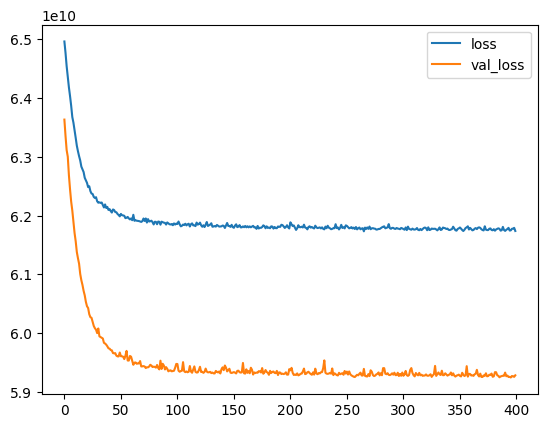

In [150]:
losses.plot() #No overfitting occured

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [153]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [154]:
np.sqrt(mean_squared_error(y_test,predictions))

243482.5840312546

In [155]:
mean_absolute_error(y_test, predictions)

161879.9579590145

In [156]:
df['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [157]:
5.402966e+05

540296.6

In [158]:
#To get deep understanding of our evaluation matrix
explained_variance_score(y_test, predictions)


0.5779889625285953

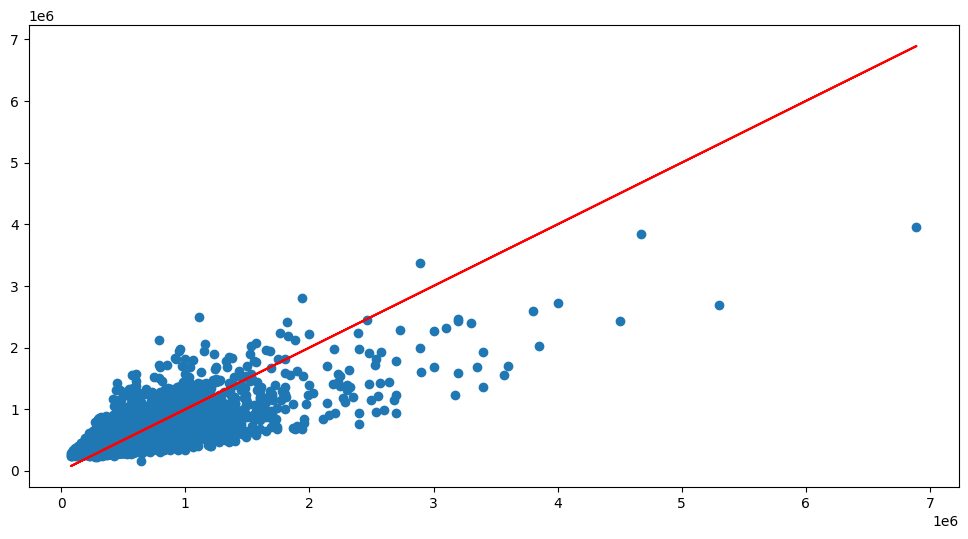

In [159]:
plt.figure(figsize = (12,6))

plt.scatter(y_test, predictions)#Our Predictions
plt.plot(y_test, y_test, 'red') #To find the best prediction line

In [160]:
# Reshape according to the actual size of y_test
errors = y_test.reshape(6484, 1) - predictions


<ipython-input-161-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

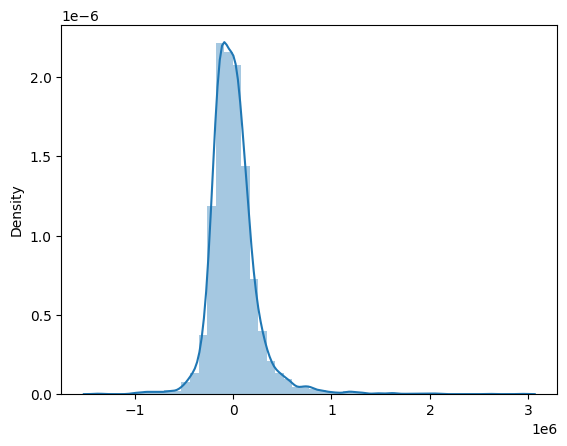

In [161]:
sns.distplot(errors)

### Predicting on a brand new house

In [162]:
#Identify the features of the house
single_house  = df.drop('price', axis = 1).iloc[0]
single_house

bedrooms        3.0
bathrooms       1.0
sqft         1180.0
Name: 0, dtype: float64

In [170]:
#-1 is to keep the old dimensions along the axis
single_house = single_house.values.reshape(1, 3)  # Reshape to (1, 3)
scaled_data = scaler.transform(single_house_reshaped)
#scaled using MinMax scaler


In [171]:
model.predict(single_house)

1/1 [==============================] - 0s 27ms/step


array([[6.60333e+09]], dtype=float32)

In [172]:
df.head(1)

,price,bedrooms,bathrooms,sqft
0,221900.0,3,1.0,1180


In [173]:
df.iloc[0]

price        221900.0
bedrooms          3.0
bathrooms         1.0
sqft           1180.0
Name: 0, dtype: float64

In [174]:
!pip install tensorflowjs

In [175]:
import tensorflowjs as tfjs

In [176]:
tfjs.converters.save_keras_model(model,"/content/")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [177]:
from google.colab import files

In [179]:
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>